In [34]:
import torch
import os
import shutil

from minerva.models.nets.time_series.gans import TTSGAN_Generator, TTSGAN_Discriminator, TTSGAN_Encoder, GAN

#### Fixing backbone state dict

##### backbone from minerva

In [24]:
version = 'version_0'
file_path = f'training/ttsgan_minerva/{version}/checkpoints/'
ckpt_path = os.listdir(file_path)
print(ckpt_path)
ckpt = torch.load(file_path + ckpt_path[0])
ckpt['state_dict'].keys()

['epoch=299-step=276000.ckpt']


odict_keys(['gen.pos_embed', 'gen.l1.weight', 'gen.l1.bias', 'gen.blocks.0.0.fn.0.weight', 'gen.blocks.0.0.fn.0.bias', 'gen.blocks.0.0.fn.1.keys.weight', 'gen.blocks.0.0.fn.1.keys.bias', 'gen.blocks.0.0.fn.1.queries.weight', 'gen.blocks.0.0.fn.1.queries.bias', 'gen.blocks.0.0.fn.1.values.weight', 'gen.blocks.0.0.fn.1.values.bias', 'gen.blocks.0.0.fn.1.projection.weight', 'gen.blocks.0.0.fn.1.projection.bias', 'gen.blocks.0.1.fn.0.weight', 'gen.blocks.0.1.fn.0.bias', 'gen.blocks.0.1.fn.1.0.weight', 'gen.blocks.0.1.fn.1.0.bias', 'gen.blocks.0.1.fn.1.3.weight', 'gen.blocks.0.1.fn.1.3.bias', 'gen.blocks.1.0.fn.0.weight', 'gen.blocks.1.0.fn.0.bias', 'gen.blocks.1.0.fn.1.keys.weight', 'gen.blocks.1.0.fn.1.keys.bias', 'gen.blocks.1.0.fn.1.queries.weight', 'gen.blocks.1.0.fn.1.queries.bias', 'gen.blocks.1.0.fn.1.values.weight', 'gen.blocks.1.0.fn.1.values.bias', 'gen.blocks.1.0.fn.1.projection.weight', 'gen.blocks.1.0.fn.1.projection.bias', 'gen.blocks.1.1.fn.0.weight', 'gen.blocks.1.1.fn.0.bi

In [25]:
new_model = GAN(
        generator = TTSGAN_Generator(seq_len= 60, channels=6),
        discriminator = TTSGAN_Discriminator(seq_len=60, channels=6),
        loss_gen = torch.nn.BCELoss(),
        loss_dis = torch.nn.BCELoss(),
        )

new_model.load_state_dict(ckpt['state_dict'])
new_model.dis.state_dict().keys()


odict_keys(['backbone.0.cls_token', 'backbone.0.positions', 'backbone.0.projection.1.weight', 'backbone.0.projection.1.bias', 'backbone.1.0.0.fn.0.weight', 'backbone.1.0.0.fn.0.bias', 'backbone.1.0.0.fn.1.keys.weight', 'backbone.1.0.0.fn.1.keys.bias', 'backbone.1.0.0.fn.1.queries.weight', 'backbone.1.0.0.fn.1.queries.bias', 'backbone.1.0.0.fn.1.values.weight', 'backbone.1.0.0.fn.1.values.bias', 'backbone.1.0.0.fn.1.projection.weight', 'backbone.1.0.0.fn.1.projection.bias', 'backbone.1.0.1.fn.0.weight', 'backbone.1.0.1.fn.0.bias', 'backbone.1.0.1.fn.1.0.weight', 'backbone.1.0.1.fn.1.0.bias', 'backbone.1.0.1.fn.1.3.weight', 'backbone.1.0.1.fn.1.3.bias', 'backbone.1.1.0.fn.0.weight', 'backbone.1.1.0.fn.0.bias', 'backbone.1.1.0.fn.1.keys.weight', 'backbone.1.1.0.fn.1.keys.bias', 'backbone.1.1.0.fn.1.queries.weight', 'backbone.1.1.0.fn.1.queries.bias', 'backbone.1.1.0.fn.1.values.weight', 'backbone.1.1.0.fn.1.values.bias', 'backbone.1.1.0.fn.1.projection.weight', 'backbone.1.1.0.fn.1.projec

##### backbone from tts

In [41]:
ckpt_dir_path = f'../../logs/minerva/'
ckpt_list = os.listdir(ckpt_dir_path)
version = 0
ckpt = torch.load(f'{ckpt_dir_path + ckpt_list[version]}/Model/checkpoint')
print(f'current_path: {ckpt_dir_path + ckpt_list[version]}/Model/checkpoint')
ckpt['dis_state_dict'].keys()

current_path: ../../logs/minerva/UCI_DAGHAR_Multiclass_137694_D_60_6axis_2025_03_17_19_55_47/Model/checkpoint


odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weight', '1.2.0.fn.1

In [42]:
ckpt['dis_state_dict']['0.cls_token'][0][0][0:10]

tensor([-2.1020,  0.5510,  0.3637, -0.4594, -0.7321, -0.5686,  0.2233,  0.7594,
         1.5826, -0.9896], device='cuda:0')

New keys from dict should be:
['backbone.0.cls_token', 'backbone.0.positions', 'backbone.0.projection.1.weight', 'backbone.0.projection.1.bias', 'backbone.1.0.0.fn.0.weight', 'backbone.1.0.0.fn.0.bias', 'backbone.1.0.0.fn.1.keys.weight', 'backbone.1.0.0.fn.1.keys.bias', 'backbone.1.0.0.fn.1.queries.weight', 'backbone.1.0.0.fn.1.queries.bias', 'backbone.1.0.0.fn.1.values.weight', 'backbone.1.0.0.fn.1.values.bias', 'backbone.1.0.0.fn.1.projection.weight', 'backbone.1.0.0.fn.1.projection.bias', 'backbone.1.0.1.fn.0.weight', 'backbone.1.0.1.fn.0.bias', 'backbone.1.0.1.fn.1.0.weight', 'backbone.1.0.1.fn.1.0.bias', 'backbone.1.0.1.fn.1.3.weight', 'backbone.1.0.1.fn.1.3.bias', 'backbone.1.1.0.fn.0.weight', 'backbone.1.1.0.fn.0.bias', 'backbone.1.1.0.fn.1.keys.weight', 'backbone.1.1.0.fn.1.keys.bias', 'backbone.1.1.0.fn.1.queries.weight', 'backbone.1.1.0.fn.1.queries.bias', 'backbone.1.1.0.fn.1.values.weight', 'backbone.1.1.0.fn.1.values.bias', 'backbone.1.1.0.fn.1.projection.weight', 'backbone.1.1.0.fn.1.projection.bias', 'backbone.1.1.1.fn.0.weight', 'backbone.1.1.1.fn.0.bias', 'backbone.1.1.1.fn.1.0.weight', 'backbone.1.1.1.fn.1.0.bias', 'backbone.1.1.1.fn.1.3.weight', 'backbone.1.1.1.fn.1.3.bias', 'backbone.1.2.0.fn.0.weight', 'backbone.1.2.0.fn.0.bias', 'backbone.1.2.0.fn.1.keys.weight', 'backbone.1.2.0.fn.1.keys.bias', 'backbone.1.2.0.fn.1.queries.weight', 'backbone.1.2.0.fn.1.queries.bias', 'backbone.1.2.0.fn.1.values.weight', 'backbone.1.2.0.fn.1.values.bias', 'backbone.1.2.0.fn.1.projection.weight', 'backbone.1.2.0.fn.1.projection.bias', 'backbone.1.2.1.fn.0.weight', 'backbone.1.2.1.fn.0.bias', 'backbone.1.2.1.fn.1.0.weight', 'backbone.1.2.1.fn.1.0.bias', 'backbone.1.2.1.fn.1.3.weight', 'backbone.1.2.1.fn.1.3.bias', 'classification_head.clshead.1.weight', 'classification_head.clshead.1.bias', 'classification_head.clshead.2.weight', 'classification_head.clshead.2.bias']

old keys is:
['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weight', '1.2.0.fn.1.queries.bias', '1.2.0.fn.1.values.weight', '1.2.0.fn.1.values.bias', '1.2.0.fn.1.projection.weight', '1.2.0.fn.1.projection.bias', '1.2.1.fn.0.weight', '1.2.1.fn.0.bias', '1.2.1.fn.1.0.weight', '1.2.1.fn.1.0.bias', '1.2.1.fn.1.3.weight', '1.2.1.fn.1.3.bias', '2.clshead.1.weight', '2.clshead.1.bias', '2.clshead.2.weight', '2.clshead.2.bias']

In [43]:
keys = ckpt["dis_state_dict"].keys()
print(f'original keys: {keys}')
new_ckpt = {'dis_state_dict': {}}

list_of_new_keys_in_order = ['backbone.0.cls_token', 'backbone.0.positions', 'backbone.0.projection.1.weight', 'backbone.0.projection.1.bias', 'backbone.1.0.0.fn.0.weight', 'backbone.1.0.0.fn.0.bias', 'backbone.1.0.0.fn.1.keys.weight', 'backbone.1.0.0.fn.1.keys.bias', 'backbone.1.0.0.fn.1.queries.weight', 'backbone.1.0.0.fn.1.queries.bias', 'backbone.1.0.0.fn.1.values.weight', 'backbone.1.0.0.fn.1.values.bias', 'backbone.1.0.0.fn.1.projection.weight', 'backbone.1.0.0.fn.1.projection.bias', 'backbone.1.0.1.fn.0.weight', 'backbone.1.0.1.fn.0.bias', 'backbone.1.0.1.fn.1.0.weight', 'backbone.1.0.1.fn.1.0.bias', 'backbone.1.0.1.fn.1.3.weight', 'backbone.1.0.1.fn.1.3.bias', 'backbone.1.1.0.fn.0.weight', 'backbone.1.1.0.fn.0.bias', 'backbone.1.1.0.fn.1.keys.weight', 'backbone.1.1.0.fn.1.keys.bias', 'backbone.1.1.0.fn.1.queries.weight', 'backbone.1.1.0.fn.1.queries.bias', 'backbone.1.1.0.fn.1.values.weight', 'backbone.1.1.0.fn.1.values.bias', 'backbone.1.1.0.fn.1.projection.weight', 'backbone.1.1.0.fn.1.projection.bias', 'backbone.1.1.1.fn.0.weight', 'backbone.1.1.1.fn.0.bias', 'backbone.1.1.1.fn.1.0.weight', 'backbone.1.1.1.fn.1.0.bias', 'backbone.1.1.1.fn.1.3.weight', 'backbone.1.1.1.fn.1.3.bias', 'backbone.1.2.0.fn.0.weight', 'backbone.1.2.0.fn.0.bias', 'backbone.1.2.0.fn.1.keys.weight', 'backbone.1.2.0.fn.1.keys.bias', 'backbone.1.2.0.fn.1.queries.weight', 'backbone.1.2.0.fn.1.queries.bias', 'backbone.1.2.0.fn.1.values.weight', 'backbone.1.2.0.fn.1.values.bias', 'backbone.1.2.0.fn.1.projection.weight', 'backbone.1.2.0.fn.1.projection.bias', 'backbone.1.2.1.fn.0.weight', 'backbone.1.2.1.fn.0.bias', 'backbone.1.2.1.fn.1.0.weight', 'backbone.1.2.1.fn.1.0.bias', 'backbone.1.2.1.fn.1.3.weight', 'backbone.1.2.1.fn.1.3.bias', 'classification_head.clshead.1.weight', 'classification_head.clshead.1.bias', 'classification_head.clshead.2.weight', 'classification_head.clshead.2.bias']
list_of_old_keys_in_order = ['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weight', '1.2.0.fn.1.queries.bias', '1.2.0.fn.1.values.weight', '1.2.0.fn.1.values.bias', '1.2.0.fn.1.projection.weight', '1.2.0.fn.1.projection.bias', '1.2.1.fn.0.weight', '1.2.1.fn.0.bias', '1.2.1.fn.1.0.weight', '1.2.1.fn.1.0.bias', '1.2.1.fn.1.3.weight', '1.2.1.fn.1.3.bias', '2.clshead.1.weight', '2.clshead.1.bias', '2.clshead.2.weight', '2.clshead.2.bias']
for i, key in enumerate(keys):
    new_key = list_of_new_keys_in_order[i]
    new_ckpt['dis_state_dict'][new_key] = ckpt['dis_state_dict'][key]

print(f'after key check: {new_ckpt["dis_state_dict"].keys()}')
print(f'\nare they compatible with the model now? {list(new_ckpt["dis_state_dict"].keys()) == list(new_model.dis.state_dict().keys())}')

if os.path.isdir(f'backbones/{version}') == False:
    os.mkdir(f'backbones/{version}')
torch.save(new_ckpt, f'backbones/{version}/final.ckpt')
shutil.copy(f'{ckpt_dir_path + ckpt_list[version]}/Model/checkpoint', f'backbones/{version}/original.ckpt')
print('done')

original keys: odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weigh

#### See KNN training

In [45]:
import csv

def extract_losses(file_path):
    knn_validation = []

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if 'knn_accuracy' in row and row['knn_accuracy']:
                knn_validation.append(float(row['knn_accuracy']))

        return knn_validation

knn loss [0.24451620876789093, 0.46634888648986816, 0.45751067996025085, 0.4716678559780121, 0.49316197633743286, 0.4999554455280304, 0.5298534631729126, 0.5301117897033691, 0.5170883536338806, 0.5237460136413574, 0.5248262882232666, 0.5406004786491394, 0.5562321543693542, 0.5414023399353027, 0.5282297134399414, 0.5165382027626038, 0.5123329758644104, 0.5149077773094177, 0.5155871510505676, 0.5195273756980896, 0.5067489147186279, 0.5006281137466431, 0.5002338886260986, 0.5393710136413574, 0.5218572020530701, 0.5158588886260986, 0.5130189657211304, 0.5206477046012878, 0.5320206880569458, 0.5251180529594421, 0.5164090394973755, 0.5190039277076721, 0.4934737980365753, 0.5010290741920471, 0.49778154492378235, 0.5014500021934509, 0.4847247004508972, 0.5008174180984497, 0.49016615748405457, 0.49573013186454773, 0.4828425645828247, 0.476715087890625, 0.4753430187702179, 0.48013854026794434, 0.4944048523902893, 0.48610344529151917, 0.4893442690372467, 0.48511895537376404, 0.48230576515197754, 

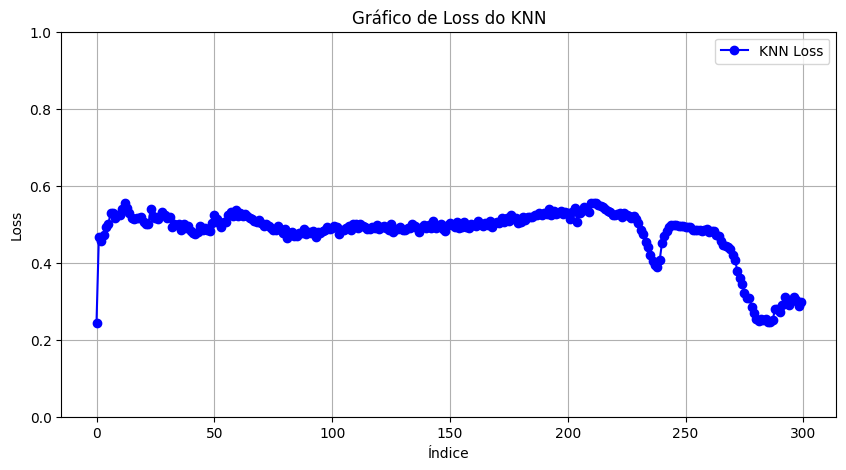

In [54]:
file_path = f'./training/ttsgan_minerva/version_1/metrics.csv'
knn_loss  = extract_losses(file_path)
print("knn loss", knn_loss)
import matplotlib.pyplot as plt

# Criar uma lista de índices de 0 a 100
indices = list(range(len(knn_loss)))

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(indices, knn_loss, marker='o', linestyle='-', color='b', label='KNN Loss')
plt.xlabel('Índice')
plt.ylabel('Loss')
plt.title('Gráfico de Loss do KNN')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ajustar o limite do eixo y para melhor visualização

# Mostrar o gráfico
plt.show()

#### Ver gif

In [8]:
import re
import os
from PIL import Image

def numerical_sort(value):
    """
    Custom sort function to sort filenames with numerical values correctly.
    """
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

def create_gif(image_paths, output_gif_path, duration=500):
    images = [Image.open(image_path) for image_path in image_paths]
    # Save as GIF
    images[0].save(
        f'{output_gif_path}/tsne.gif',
        save_all=True,
        append_images=images[1:],            
        duration=duration,
        loop=0  # 0 means infinite loop
    )  

In [9]:
image_save_dir = './training/ttsgan_minerva/version_5/tsne/generator'

image_files = sorted(os.listdir(image_save_dir), key=numerical_sort)
image_paths = [os.path.join(image_save_dir, file_name) for file_name in image_files if file_name.endswith('.png')]

create_gif(image_paths, image_save_dir, duration=200)